<a href="https://colab.research.google.com/github/HSAkash/Corn-Disease-Detection/blob/main/01_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset download from kaggle

In [1]:
! pip install -q kaggle
! mkdir ~/.kaggle
# Kaggle authentication data(kaggle.json)
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d smaranjitghose/corn-or-maize-leaf-disease-dataset

 98% 158M/161M [00:01<00:00, 119MB/s]
100% 161M/161M [00:01<00:00, 126MB/s]


In [3]:
! unzip -q corn-or-maize-leaf-disease-dataset.zip

# Import dependencies

In [4]:
from glob import glob
from tqdm.auto import tqdm
import shutil
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Train test split

In [5]:
source_dir = 'data'
dist_dir = 'cornDataset'

In [6]:
class_names = ['Blight', "Common_Rust", "Gray_Leaf_Spot", "Healthy"]
for class_name in class_names:
    os.makedirs(f"{dist_dir}/test/{class_name}")
    os.makedirs(f"{dist_dir}/train/{class_name}")

In [7]:
for class_name in tqdm(class_names):
    images_path = glob(f"{source_dir}/{class_name}/*")
    train_paths, test_paths  = train_test_split(images_path, test_size=0.2, random_state=42)
    for i, img_path in enumerate(train_paths):
        img_dist_path = f"{dist_dir}/train/{class_name}/{i:05d}.jpg"
        shutil.copy(img_path, img_dist_path)
    for i, img_path in enumerate(test_paths):
        img_dist_path = f"{dist_dir}/test/{class_name}/{i:05d}.jpg"
        shutil.copy(img_path, img_dist_path)

  0%|          | 0/4 [00:00<?, ?it/s]

# Image augmentation

In [8]:
from imgaug import augmenters as iaa
import imgaug as ia
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
aug_rotation = iaa.Sequential([iaa.Affine(rotate=(-45, 45))])
aug_Fliplr = iaa.Sequential([iaa.Fliplr(0.5)])
aug_Flipud = iaa.Sequential([iaa.Flipud(0.5)])
aug_zoom = iaa.Sequential([iaa.Affine(scale=(0.8, 1.2))])
aug_brightness = iaa.Sequential([iaa.Multiply((0.8, 1.2))])
aug_contrastNormalization = iaa.Sequential([iaa.ContrastNormalization((0.8, 1.2))])
aug_crop_pad = iaa.Sequential([iaa.Crop(percent=(0, 0.1)), iaa.Pad(percent=(0, 0.1))])

In [10]:
aug_models = {
    'aug_rotaion'               :   aug_rotation,
    'aug_Fliplr'                :   aug_Fliplr,
    'aug_Flipud'                :   aug_Flipud,
    'aug_zoom'                  :   aug_zoom,
    'aug_brightness'            :   aug_brightness,
    'aug_contrastNormalization' :   aug_contrastNormalization,
    'aug_crop_pad'              :   aug_crop_pad
}

In [11]:
all_train_imge_paths = glob("cornDataset/train/*/*")
len(all_train_imge_paths)

3348

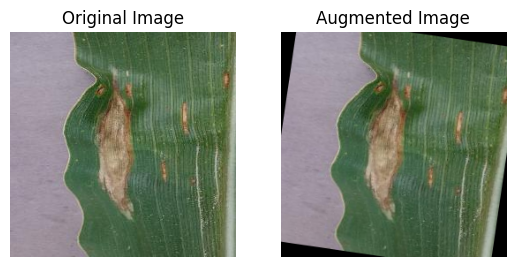

In [12]:
image_path = all_train_imge_paths[0]
img = Image.open(image_path)
img = np.array(img)

# Apply the augmentation to the image using the 'images' parameter
aug_img = aug_models['aug_rotaion'](image=img)

# Display the original and augmented images (optional)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(aug_img)
plt.title('Augmented Image')
plt.axis('off')

plt.show()


In [13]:
for img_path in tqdm(all_train_imge_paths):
    for aug_model in aug_models:
        dist_path = img_path.split('.')
        dist_path = f"{dist_path[0]}_{aug_model}.{dist_path[-1]}"
        if os.path.exists(dist_path):
            continue
        # Read the image using Pillow
        img = Image.open(img_path)
        # Convert the Pillow image to a NumPy array
        img = np.array(img)
        aug_img = aug_models[aug_model](image=img)
        aug_img = Image.fromarray(np.uint8(aug_img))
        # If the image is RGBA, convert it to RGB
        if aug_img.mode == 'RGBA':
            aug_img = aug_img.convert('RGB')
        aug_img.save(dist_path)

  0%|          | 0/3348 [00:00<?, ?it/s]

In [14]:
! zip -q -r "cornDataset.zip" "cornDataset"

In [15]:
! cp "cornDataset.zip" "/content/drive/MyDrive/Colab Notebooks/Crops_disease/corn/"